# Ejercicio 8

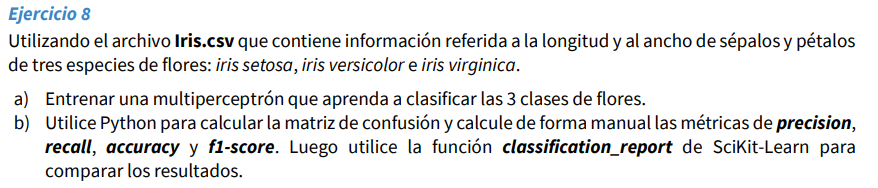

### Importe de datos y de librerias

In [1]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'Iris.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=',')

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn import preprocessing, metrics, model_selection 
import pandas as pd

### Inciso a

Entrenar una multiperceptrón que aprenda a clasificar las 3 clases de flores

In [4]:
X = np.array(df.iloc[:, :-1])
Y = np.array(df['class'])

In [5]:
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y)

etiquetas = encoder.inverse_transform([0,1,2])
print("\n\n Etiquetas = ",etiquetas)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


 Etiquetas =  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
entradas = X.shape[1]
salidas = len(np.unique(Y))
print(entradas)
print (salidas)

4
3


In [7]:
#conjuntos de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.30)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

In [8]:
Y_trainB = to_categorical(Y_train) #convierto las etiquetas en su representacion one hot encoding

DEFINO EL MODELO

In [9]:
model=Sequential() #se crea un modelo de capas secuenciales
model.add(Dense(2, input_shape=[4], activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train,Y_trainB, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1467 - loss: 1.1663  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1491 - loss: 1.1656 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1745 - loss: 1.1563 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1776 - loss: 1.1437 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2012 - loss: 1.1313 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1856 - loss: 1.1275 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1883 - loss: 1.1238 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2036 - loss: 1.1135 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2917 - loss: 1.0935 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3656 - loss: 1.0780 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3513 - loss: 1.0866 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4048 - lo

In [12]:
score = model.evaluate(X_train, Y_trainB)

print('Error :', score[0]) 
print('Accuracy:', score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.4393  
Error : 0.4423781633377075
Accuracy: 0.8285714387893677


In [13]:
# predecir la salida del modelo
Y_pred = model.predict(X_test)

# Convertir la salida del modelo en un número entero
Y_pred2 = np.argmax(Y_pred,axis=1)

print("%% aciertos : %.3f" % metrics.accuracy_score(Y_test, Y_pred2))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
% aciertos : 0.800


### Inciso b

Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de precision,
recall, accuracy y f1-score. Luego utilice la función classification_report de SciKit-Learn para
comparar los resultados.

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Asegurarse de que las dimensiones de Y_pred y Y_test coincidan
print(f"Dimensión de Y_pred: {Y_pred.shape}")
print(f"Dimensión de Y_test: {Y_test.shape}")

# Si Y_pred es un array de probabilidades continuas, conviértelo en clases discretas
if len(Y_pred.shape) > 1:  # Esto significa que es bidimensional (probabilidades)
    Y_pred_class = np.argmax(Y_pred, axis=1)
    print('Era bidimensional, estaba en formato one hot y se transforma a discretas')
else:
    Y_pred_class = Y_pred  # Si ya son etiquetas, no es necesario np.argmax
    print('ya son etiquetas, no es necesario np.argmax')

# Si Y_test está en formato one-hot, conviértelo en clases discretas
if len(Y_test.shape) > 1:  # Esto significa que es one-hot encoded
    print('y_test en formato one hot se transforma en clases discretas')
    Y_test_class = np.argmax(Y_test, axis=1)
else:
    Y_test_class = Y_test  # Si ya son etiquetas, no es necesario np.argmax
    print('ya son etiquetas no es necesario np.argmax')


print(' ')
# Ahora puedes generar la matriz de confusión
cm = confusion_matrix(Y_test_class, Y_pred_class)
print("Matriz de confusión:")
print(cm)
print(' ')
# Generar el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(Y_test_class, Y_pred_class))


Dimensión de Y_pred: (45, 3)
Dimensión de Y_test: (45,)
Era bidimensional, estaba en formato one hot y se transforma a discretas
ya son etiquetas no es necesario np.argmax
 
Matriz de confusión:
[[15  0  0]
 [ 0  7  9]
 [ 0  0 14]]
 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.44      0.61        16
           2       0.61      1.00      0.76        14

    accuracy                           0.80        45
   macro avg       0.87      0.81      0.79        45
weighted avg       0.88      0.80      0.79        45



### Calculo manual de las metricas

VERDADEROS POSITIVOS

In [22]:
VP = np.diag(cm) #extraigo los valores de la diagonal de la matriz de confusion, que son los verdaderos positivos
VP

array([15,  7, 14], dtype=int64)

FALSOS POSITIVOS

In [29]:
#por columna obtiene todos los valores y les resta los de la diagonal (que son los verdaderos)
#como es por columna se entienden como FALSOS POSITIVOS (ya que las columnas tienen los valores predichos)
#predigo que va a ser virginica y no lo es (es versicolor) --> FALSO POSITIVO
FP = np.sum(cm, axis=0) - VP 
FP


array([0, 0, 9], dtype=int64)

FALSOS NEGATIVOS

In [30]:
FN = np.sum(cm, axis=1) - VP
FN
#por fila obtengo todos los valores y les resto los de la diagonal (que son los verdaderos)
#como miro por fila son los FALSOS NEGATIVOS (ya que las filas tienen los valores reales)
#predigo que no va a ser versicolor y en realidad si lo era --> FALSO NEGATIVO

array([0, 9, 0], dtype=int64)

VERDADEROS NEGATIVOS

In [32]:
VN = np.sum(cm) - (FP + FN + VP)
#son los casos correctamente identificados como no pertenecientes a una clase en particular
#np.sum(cm) --> es el total de las predicciones en toda la matriz
#FP + FN + VP --> todos los ejemplos en los que la clase esta involucrada, ya sea como una prediccion correcta o no
VN


array([30, 29, 22], dtype=int64)

- CLASE 1: 30 casos el modelo predijo correctamente que la clase no pertencecia a la clase 1
- CLASE 2: 29 casos el modelo predijo correctamente que la clase no pertencecia a la clase 2
- CLASE 3: 22 casos el modelo predijo correctamente que la clase no pertencecia a la clase 3

Ya tengo toda la informacion para poder calcular las metricas manualmente

In [33]:
precision = VP / (VP + FP)
precision

array([1.        , 1.        , 0.60869565])

In [34]:
recall = VP / (VP + FN)
recall

array([1.    , 0.4375, 1.    ])

In [35]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

array([1.        , 0.60869565, 0.75675676])

In [37]:
accuracy = (np.sum(VP) + np.sum(VN) )/ (np.sum(VP) + np.sum(FP) + np.sum(FN) + np.sum(VN))
accuracy

0.8666666666666667

Las metricas calculadas manualmente dieron iguales a las del report!!!!!!!!!!!!!!